In [6]:
from pyavis.ipywidgets import DeviceSelector
from pyavis.shared.device_util import DeviceInfo
from pya import Aserver, startup

s = None
def on_value_change(device_info: DeviceInfo):
    global s
    if s:
        Aserver.shutdown_default_server()
    device_id = device_info.index
    try:
        s = startup(device=device_id)
    except:
        pass

selector = DeviceSelector(on_value_change)
selector

idx Device Name              INP OUT    SR   INP-(Lo|Hi)  OUT-(Lo/Hi) (Latency in ms)
0   Microsoft Soundmapper - Input   2   0 44100     90    180    90    180
1   Kopfhörermikrofon (HyperX Virtu   2   0 44100     90    180    90    180
2   Mikrofonarray (Realtek(R) Audio   2   0 44100     90    180    90    180
3   Microsoft Soundmapper - Output   0   2 44100     90    180    90    180
4   Kopfhörer (HyperX Virtual Surro   0   2 44100     90    180    90    180
5   Lautsprecher (Realtek(R) Audio)   0   2 44100     90    180    90    180
6   Primärer Soundaufnahmetreiber   2   0 44100 1.2e+02    240     0      0
7   Kopfhörermikrofon (HyperX Virtual Surround Sound)   2   0 44100 1.2e+02    240     0      0
8   Mikrofonarray (Realtek(R) Audio)   2   0 44100 1.2e+02    240     0      0
9   Primärer Soundtreiber      0   2 44100      0      01.2e+02    240
10  Kopfhörer (HyperX Virtual Surround Sound)   0   2 44100      0      01.2e+02    240
11  Lautsprecher (Realtek(R) Audio)   0   2 4

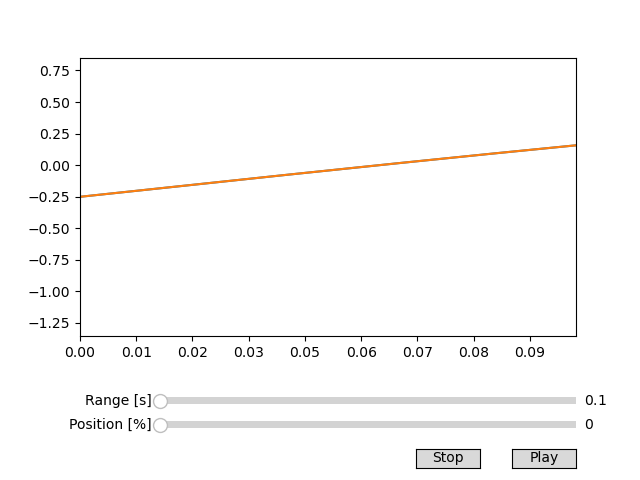

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pya
import pyavis

signal_array = np.sin(2 * np.pi * 2 * np.linspace(0, 1, 44100 * 3))
audio1 = pya.Asig(signal_array).gain(db=-6).stereo()
audio2 = pya.Asig(signal_array - 0.5).gain(db=-6).stereo()

audio = (audio1 + audio2)

fig = pyavis.ipywidgets.AudioPlotFigure(audio=audio)

plt.figure(FigureClass=pyavis.ipywidgets.AudioPlotFigure, audio=audio)
plt.ioff()

In [24]:
print(np.max(audio.sig), np.min(audio.sig))

0.8933672 -0.8933672
